Необходимо запустить практическую часть занятия, и посмотреть самому то, о чём говорили на лекции. По образу практики, попробуйте создать искусственный датасет с лишними столбцами. Целевую метку, при правильной обработке данных, формируйте таким образом, чтобы без затруднений её смогла описать линейная модель. Ориентируйтесь на то, что было показано во время занятия, и каждый шаг описывайте в markdown. Здесь важно видеть ваш ход мысли. Не бойтесь ошибиться или написать не то. Данное задание не имеет какого-то “правильного” решения. Цель - достичь базового понимания проблемы. Чем больше вы фантазируете, тем лучше :) Тем не менее, старайтесь представить те ситуации, которые по-вашему мнению могли бы быть в реальных данных. Успеха!

Рассмотрим на примере стоимости книг. Исходные параметры:
Формат книги;
Количество страниц;
Страна издания книги;
Год издания книги.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
n_samples = 10000 # количество книг

paper_sizes = {
    'A2': (420, 594),
    'A3': (297, 420),
    'A4': (210, 297),
    'A5': (148, 210),
    'A6': (105, 148)
} # словарь формат - размер листа
countries = ['Russia', 'USA', 'Italy', 'Germany', 'England', 'Other'] # страны

year = np.random.randint(1900, 2020, size=n_samples) # год издания
country = np.random.choice(countries, n_samples)  # страна издания (из заданного массива)
page_count = np.random.randint(50, 1500, size=n_samples)  # количество страниц
size = np.random.choice(list(paper_sizes.keys()), n_samples) # формат книги

data = pd.DataFrame({
    'year': year,
    'country': country,
    'page_count': page_count,
    'size': size
})
data['page_width'] = data.apply(lambda row: paper_sizes[row['size']][0] / 10, axis=1)   # переходим от формата к размеру (в см)
data['page_length'] = data.apply(lambda row: paper_sizes[row['size']][1] / 10, axis=1)
data['price'] = data['page_width'] * data['page_length'] * data['page_count'] * 0.005 + 100  # расчёт цены

data.head()

,year,country,page_count,size,page_width,page_length,price
0,1915,USA,1096,A4,21.0,29.7,3517.8760
1,1942,Germany,121,A4,21.0,29.7,477.3385
2,2017,Italy,845,A2,42.0,59.4,10640.5300
3,1923,Italy,761,A4,21.0,29.7,2473.1785
4,1939,Italy,281,A3,29.7,42.0,1852.5970


In [3]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

In [4]:
def get_labeled_data():
    data_labeled = data.copy()

    params = ['country', 'size']

    for param in params:
        data_labeled[param] = lb_make.fit_transform(data[param])

    return data_labeled

In [5]:
from sklearn.metrics import mean_absolute_error

data_labeled = get_labeled_data()
X = data_labeled[['size', 'page_count']] 
y = data['price']  # целевая функция
reg = LinearRegression().fit(X, y)  # линейная регрессия по двум параметрам
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y))) # ошибка получилась большой

Weights: [-2169.41386689     4.79370586]
Bias: 4454.5786236952845
Error: 1651.842574967072


In [6]:
data['volume'] = data['page_width'] * data['page_length'] * data['page_count'] # вводим новый признак "объём книги"
data.head()

,year,country,page_count,size,page_width,page_length,price,volume
0,1915,USA,1096,A4,21.0,29.7,3517.8760,683575.2
1,1942,Germany,121,A4,21.0,29.7,477.3385,75467.7
2,2017,Italy,845,A2,42.0,59.4,10640.5300,2108106.0
3,1923,Italy,761,A4,21.0,29.7,2473.1785,474635.7
4,1939,Italy,281,A3,29.7,42.0,1852.5970,350519.4


In [7]:
from sklearn.metrics import mean_absolute_error

data_labeled = get_labeled_data()
X = data_labeled[['volume']]
y = data['price']
reg = LinearRegression().fit(X, y) # линейная регрессия с новым признаком
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [0.005]
Bias: 99.99999999999409
Error: 5.0140641860707544e-12


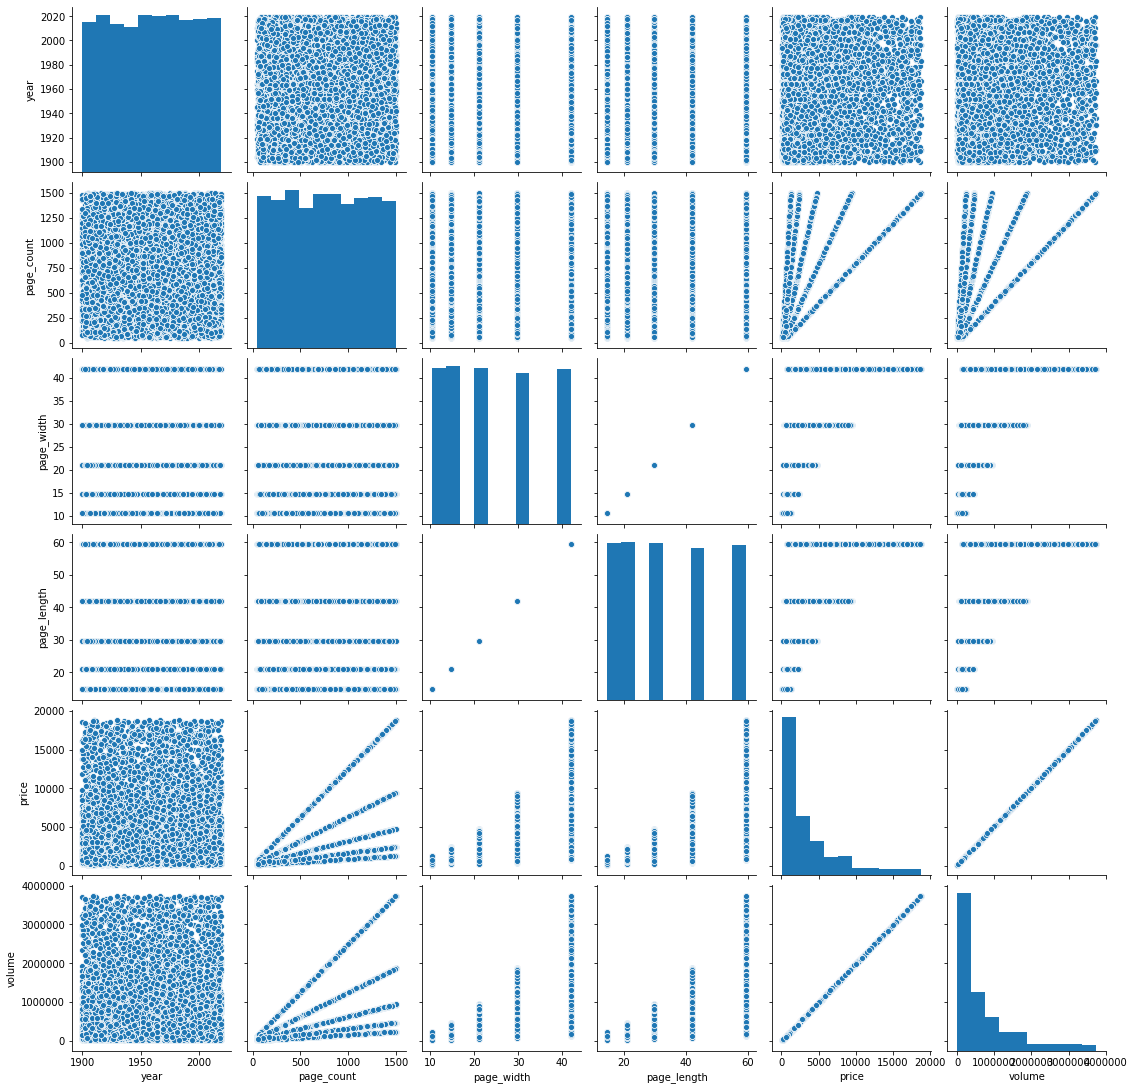

In [8]:
sns.pairplot(data)